In [467]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv


##  Kode `import`

Kode ini mengimpor tiga pustaka Python esensial untuk visualisasi data dan pemrosesan gambar:

* **`import matplotlib.pyplot as plt`**
    * **Fungsi:** Pustaka untuk membuat plot dan visualisasi data (grafik, histogram, dll.).
    * **Peran:** Digunakan untuk **menampilkan gambar** yang sudah diproses atau data visual lainnya. `plt` adalah alias umumnya.

* **`import numpy as np`**
    * **Fungsi:** Pustaka inti untuk komputasi numerik dengan array dan matriks multidimensi berkinerja tinggi.
    * **Peran:** Gambar direpresentasikan sebagai array numerik; `numpy` memungkinkan **manipulasi data piksel** yang efisien. `np` adalah alias umumnya.

* **`import cv2 as cv`**
    * **Fungsi:** Modul Python untuk OpenCV, pustaka visi komputer open-source yang kuat.
    * **Peran:** Menyediakan fungsi untuk **membaca, memproses, dan menganalisis gambar/video** (misalnya, deteksi objek, filter, transformasi). `cv` adalah alias umumnya.

**Secara Bersama-sama:**
`cv2` (OpenCV) digunakan untuk *memproses* gambar (yang berupa array `numpy`), dan `matplotlib` (`plt`) digunakan untuk *menampilkan* hasilnya.

In [468]:
# Membaca gambar awal
adudu = plt.imread("Assets/adudu.jpg")
boboiboy = plt.imread("Assets/boboiboy.jpg")

R_add = adudu[:, :, 0]
G_add = adudu[:, :, 1]
B_add = adudu[:, :, 2]

adudu_gray  = 0.299 * R_add  + 0.587 * G_add  + 0.114 * B_add
boboiboy_gray = cv.cvtColor(boboiboy, cv.COLOR_BGR2GRAY)



##  Membaca dan Mengonversi Gambar ke Grayscale

### 1. Membaca Gambar Awal

Pada tahap awal, dua gambar (`adudu.jpg` dan `boboiboy.jpg`) dibaca dari direktori "Assets". Proses ini menggunakan fungsi `imread()` dari pustaka `matplotlib.pyplot`. Penting diketahui bahwa `matplotlib` umumnya membaca gambar dalam urutan kanal warna **RGB (Merah, Hijau, Biru)**, dan nilai pikselnya biasanya dinormalisasi atau berada dalam rentang 0-255. Setelah dibaca, gambar-gambar ini disimpan sebagai array NumPy.

### 2. Memisahkan Kanal Warna (Untuk Gambar "adudu")

Untuk gambar pertama (`adudu`), kode ini secara manual memisahkan setiap kanal warnanya: Merah (Red), Hijau (Green), dan Biru (Blue). Setiap kanal ini adalah array 2 dimensi yang merepresentasikan intensitas cahaya untuk warna tersebut pada setiap piksel gambar. Pemisahan ini dilakukan dengan teknik *array slicing*, di mana kita mengambil semua baris dan kolom, lalu memilih indeks terakhir yang sesuai dengan kanal warna (0 untuk Merah, 1 untuk Hijau, 2 untuk Biru).

### 3. Konversi ke Grayscale (Metode Manual untuk "adudu")

Gambar `adudu` kemudian dikonversi ke grayscale menggunakan metode manual, yaitu dengan menerapkan rumus rata-rata berbobot pada ketiga kanal warna yang sudah dipisahkan. Rumus yang umum digunakan adalah:

`Grayscale = (0.299 * Kanal_Merah) + (0.587 * Kanal_Hijau) + (0.114 * Kanal_Biru)`

Koefisien bobot ini (`0.299`, `0.587`, `0.114`) mencerminkan sensitivitas mata manusia terhadap setiap warna (mata lebih peka terhadap hijau, sehingga memiliki bobot tertinggi). Hasilnya adalah sebuah array 2 dimensi yang merepresentasikan intensitas kecerahan piksel dari gambar `adudu` dalam skala abu-abu.

### 4. Konversi ke Grayscale (Metode OpenCV untuk "boboiboy")

Berbeda dengan `adudu`, gambar `boboiboy` dikonversi ke grayscale menggunakan fungsi `cv.cvtColor()` dari pustaka OpenCV. Metode ini lebih sering digunakan dalam praktik karena efisiensi dan keandalannya.

Fungsi `cv.cvtColor()` menerima gambar input dan flag konversi ruang warna yang diinginkan. Dalam kasus ini, `cv.COLOR_BGR2GRAY` digunakan. Penting untuk diingat bahwa **OpenCV membaca gambar dalam urutan kanal BGR (Biru, Hijau, Merah)** secara *default*, bukan RGB seperti `matplotlib`. Oleh karena itu, flag `COLOR_BGR2GRAY` memastikan konversi yang tepat dari BGR ke grayscale.



In [469]:
kernel_mean3x3 = np.full((3,3), 1/9)

kernel_mean9x9 = np.full((9,9), 1/81)

kernel_sharp = [
    [1/9, 1/9, 1/9],
    [1/9, 8/9, 1/9],
    [1/9, 1/9, 1/9]
]

kernel_smooth = [
    [1/10, 1/10, 1/10],
    [1/10, 1/5,  1/10],
    [1/10, 1/10, 1/10]
]

robert_gx = np.array([[1, 0], 
                      [0, -1]])
robert_gy = np.array([[0, 1], 
                      [-1, 0]])

sobel_gx = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])
sobel_gy = np.array([[1, 2, 1], 
                     [0, 0, 0], 
                     [-1, -2, -1]])

prewitt_gx = np.array([[-1, 0, 1], 
                       [-1, 0, 1], 
                       [-1, 0, 1]])
prewitt_gy = np.array([[1, 1, 1], 
                       [0, 0, 0], 
                       [-1, -1, -1]])

def apply_kernel(img, kernel):
    kh, kw = len(kernel), len(kernel[0])
    ih, iw = len(img), len(img[0])
    pad_h, pad_w = kh // 2, kw // 2
    output = np.zeros((ih, iw))

    for i in range(ih):
        for j in range(iw):
            acc = 0.0
            for m in range(kh):
                for n in range(kw):
                    x = i + m - pad_h
                    y = j + n - pad_w
                    if 0 <= x < ih and 0 <= y < iw:
                        acc += img[x][y] * kernel[m][n]
            output[i][j] = acc
    return output

# Aplikasikan smoothing dan sharpening
adudu_semut = apply_kernel(adudu_gray, kernel_smooth)
adudu_sharp = apply_kernel(adudu_gray, kernel_sharp)

### Penjelasan Penerapan Kernel Smoothing dan Sharpening

Beberapa kernel diterapkan untuk melakukan smoothing dan sharpening pada citra grayscale menggunakan fungsi `apply_kernel`. Fungsi ini menghitung konvolusi manual antara kernel dan citra input tanpa menggunakan pustaka eksternal seperti OpenCV.

#### Kernel yang Digunakan

1. **Mean Kernel (3x3 dan 9x9)**  
   Kernel mean berfungsi untuk meratakan nilai intensitas piksel di sekitarnya, sehingga menghasilkan efek blur.  
   - `kernel_mean3x3`: Ukuran kecil, memberikan efek smoothing ringan.  
   - `kernel_mean9x9`: Ukuran besar, memberikan efek smoothing yang lebih kuat.

2. **Kernel Sharpening**  
   Kernel ini memiliki bobot besar di pusat (8/9) dan bobot kecil (1/9) di sekelilingnya. Fungsinya adalah mempertajam tepi objek pada citra, memperjelas detail dengan meningkatkan kontras lokal antara piksel pusat dan tetangganya.

3. **Kernel Smoothing Kustom**  
   Kernel ini memberikan bobot terbesar pada piksel pusat (1/5) dan bobot lebih kecil (1/10) pada tetangga, sehingga smoothing tetap terjadi tetapi detail penting tetap dipertahankan.

#### Proses Konvolusi

Fungsi `apply_kernel(img, kernel)` melakukan konvolusi dua dimensi secara eksplisit:
- Mengiterasi setiap piksel dalam citra.
- Menerapkan padding internal untuk menjaga ukuran output.
- Mengalikan nilai-nilai kernel dengan nilai piksel di sekitarnya dan menjumlahkannya.

#### Hasil Penerapan

- `adudu_semut`: Hasil dari `apply_kernel` dengan kernel smoothing, menghasilkan citra yang lebih halus, mengurangi noise, dan menghilangkan detail tajam.
- `adudu_sharp`: Hasil dari `apply_kernel` dengan kernel sharpening, meningkatkan ketajaman citra, membuat batas objek lebih menonjol.

Efek smoothing dan sharpening ini penting dalam pra-pemrosesan citra digital, seperti deteksi tepi, penghilangan noise, atau peningkatan kualitas visual citra.


In [470]:

def padding_row(image):
    height = len(image)
    width = len(image[0])
    img_pad = np.zeros((height, width + 1))
    for i in range(height):
        for j in range(width):
            img_pad[i][j] = image[i][j]
    return img_pad

def padding_column(image):
    height = len(image)
    width = len(image[0])
    img_pad = np.zeros((height + 1, width))
    for i in range(height):
        for j in range(width):
            img_pad[i][j] = image[i][j]
    return img_pad

### Penjelasan Fungsi Padding Baris dan Kolom

#### Fungsi `padding_row(image)`

Fungsi ini menambahkan satu kolom nol di sebelah kanan setiap baris citra.  
- Dimensi output menjadi `(tinggi, lebar + 1)`.
- Elemen-elemen asli citra disalin ke posisi yang sama pada array baru.
- Kolom terakhir (paling kanan) akan berisi nol.
- Tujuan: menyiapkan citra agar dapat dikonvolusi dengan kernel yang membutuhkan padding horizontal.

#### Fungsi `padding_column(image)`

Fungsi ini menambahkan satu baris nol di bagian bawah citra.
- Dimensi output menjadi `(tinggi + 1, lebar)`.
- Semua baris dari citra asli disalin ke array baru.
- Baris terakhir (paling bawah) akan berisi nol.
- Tujuan: menyiapkan citra agar dapat dikonvolusi dengan kernel yang membutuhkan padding vertikal.



In [471]:
def konvolusi_tepi(citra, filter_utama, tipe):
    tinggi = len(citra)
    lebar = len(citra[0])
    f_tinggi = len(filter_utama)
    f_lebar = len(filter_utama[0])
    pad_tinggi = f_tinggi // 2
    pad_lebar = f_lebar // 2

    if tipe != "roberts":
        citra_padded = np.pad(citra, ((pad_tinggi, pad_tinggi), (pad_lebar, pad_lebar)), mode='constant')
    else:
        baris_padded = padding_row(citra)
        citra_padded = padding_column(baris_padded)

    hasil = np.zeros((tinggi, lebar))

    for y in range(tinggi):
        for x in range(lebar):
            for i in range(f_tinggi):
                for j in range(f_lebar):
                    ny = y + i - pad_tinggi
                    nx = x + j - pad_lebar
                    if 0 <= ny < tinggi and 0 <= nx < lebar:
                        hasil[y, x] += citra_padded[ny][nx] * filter_utama[i][j]
    return hasil

def deteksi_tepi(citra, filterX, filterY, tipe):
    gradX = konvolusi_tepi(citra, filterX, tipe)
    gradY = konvolusi_tepi(citra, filterY, tipe)
    tinggi = len(gradX)
    lebar = len(gradX[0])
    magnitude = np.zeros((tinggi, lebar))
    for y in range(tinggi):
        for x in range(lebar):
            magnitude[y][x] = np.sqrt(gradX[y][x]**2 + gradY[y][x]**2)
    return magnitude


###  Deteksi Tepi dengan Konvolusi

#### Fungsi `konvolusi_tepi(citra, filter_utama, tipe)`

Fungsi ini melakukan konvolusi antara citra dan filter deteksi tepi (seperti Sobel, Prewitt, atau Roberts).
- Ukuran padding ditentukan dari setengah ukuran filter (`pad_tinggi`, `pad_lebar`).
- Untuk filter selain **Roberts**, digunakan `np.pad` untuk memberi padding nol di sekeliling citra.
- Khusus **Roberts**, padding dilakukan manual menggunakan fungsi `padding_row` dan `padding_column` karena filter-nya 2x2.
- Proses konvolusi dilakukan dengan menjumlahkan hasil perkalian elemen-elemen filter dan area citra yang sesuai (dot product lokal).
- Hasil konvolusi disimpan dalam matriks `hasil`.

#### Fungsi `deteksi_tepi(citra, filterX, filterY, tipe)`

Fungsi ini menggabungkan hasil konvolusi dari dua arah gradien:
- `gradX`: hasil konvolusi dengan filter arah horizontal (`filterX`).
- `gradY`: hasil konvolusi dengan filter arah vertikal (`filterY`).
- Magnitudo gradien dihitung menggunakan rumus
- Hasil akhir (`magnitude`) merepresentasikan kekuatan tepi pada setiap piksel, tanpa memperhatikan arah.

#### Tujuan

Kedua fungsi ini bekerja bersama untuk mendeteksi tepi pada gambar berdasarkan perubahan intensitas piksel. Deteksi tepi sangat penting dalam analisis citra seperti segmentasi, ekstraksi fitur, dan pengenalan objek.


In [472]:
def mean_filtering(image, ksize=3):
    height = len(image)
    width = len(image[0])
    pad = ksize // 2

    output = [[0 for _ in range(width)] for _ in range(height)]

    def get_pixel(i, j):
        i = min(max(i, 0), height - 1)
        j = min(max(j, 0), width - 1)
        return image[i][j]

    for i in range(height):
        for j in range(width):
            total = 0
            count = 0
            for m in range(-pad, pad + 1):
                for n in range(-pad, pad + 1):
                    total += get_pixel(i + m, j + n)
                    count += 1
            output[i][j] = total // count
    return output


### Mean Filtering

Fungsi `mean_filtering` digunakan untuk menghaluskan (smoothing) citra dengan menerapkan rata-rata lokal pada setiap piksel. Proses ini sering disebut **mean filter** atau **box blur**.

#### Proses Utama

- Parameter `ksize` adalah ukuran kernel (default 3x3).
- Fungsi membuat output kosong dengan dimensi yang sama dengan input.
- Fungsi `get_pixel(i, j)` digunakan untuk mengakses piksel citra dengan penanganan batas (boundary), menggunakan teknik **clamping** agar indeks tidak keluar dari batas citra.
- Untuk setiap piksel `(i, j)`, dihitung rata-rata nilai piksel di sekitar area `ksize x ksize`.
- Nilai rata-rata ini kemudian disimpan di posisi yang sama pada matriks output.

#### Tujuan

Mean filtering berfungsi mengurangi **noise** dan menghasilkan citra yang lebih halus. Namun, karena semua piksel dalam kernel diberi bobot sama, tepi (edge) bisa ikut menjadi kabur (blur).

In [473]:
def median_filtering(image, ksize=3):
    height = len(image)
    width = len(image[0])
    pad = ksize // 2

    # Buat output kosong
    output = [[0 for _ in range(width)] for _ in range(height)]

    # Padding manual dengan perbatasan terluar
    def get_pixel(i, j):
        i = min(max(i, 0), height - 1)
        j = min(max(j, 0), width - 1)
        return image[i][j]

    for i in range(height):
        for j in range(width):
            window = []
            for m in range(-pad, pad + 1):
                for n in range(-pad, pad + 1):
                    window.append(get_pixel(i + m, j + n))
            window.sort()
            mid = len(window) // 2
            output[i][j] = window[mid]
    return output


### Median Filtering

Fungsi `median_filtering` digunakan untuk menghaluskan citra sekaligus menghilangkan noise, terutama **salt-and-pepper noise**. Berbeda dari mean filtering, median filter lebih efektif dalam mempertahankan tepi objek.

#### Proses Utama

- Parameter `ksize` menunjukkan ukuran jendela filter (misalnya 3x3, 5x5).
- Untuk setiap piksel `(i, j)` dalam citra, dikumpulkan semua nilai piksel di sekitarnya dalam area `ksize x ksize`.
- Daftar nilai dalam jendela ini kemudian **diurutkan**, dan nilai **median** (nilai tengah) diambil sebagai pengganti nilai piksel asli.
- Fungsi `get_pixel(i, j)` menjaga agar akses piksel tetap valid di tepi citra menggunakan metode **clamping**.

#### Tujuan

Median filter digunakan untuk mengurangi noise sembari tetap mempertahankan tepi gambar secara lebih baik dibandingkan mean filter. Tidak seperti mean filter yang bisa mengaburkan tepi, median filter menjaga struktur dan detail penting pada citra.



In [474]:
def modus_filtering(image, ksize=3):
    height = len(image)
    width = len(image[0])
    pad = ksize // 2

    output = [[0 for _ in range(width)] for _ in range(height)]

    def get_pixel(i, j):
        i = min(max(i, 0), height - 1)
        j = min(max(j, 0), width - 1)
        return image[i][j]

    for i in range(height):
        for j in range(width):
            window = []
            for m in range(-pad, pad + 1):
                for n in range(-pad, pad + 1):
                    window.append(get_pixel(i + m, j + n))

            # Hitung modus
            count = {}
            for val in window:
                val_int = int(val)  # Konversi ke int supaya bisa dihitung kemunculannya
                count[val_int] = count.get(val_int, 0) + 1

            modus = max(count, key=count.get)  # Ambil nilai dengan frekuensi terbanyak
            output[i][j] = modus
    return output


### Modus Filtering

Fungsi `modus_filtering` digunakan untuk menghaluskan citra dengan cara mengganti nilai setiap piksel dengan **modus** dari nilai piksel di sekitar jendela filter yang telah ditentukan. Modus adalah nilai yang paling sering muncul dalam suatu himpunan data.

#### Proses Utama

- **Parameter `ksize`**: Menentukan ukuran jendela filter (misalnya 3x3, 5x5), di mana nilai setiap piksel akan digantikan dengan modus dari piksel yang ada dalam jendela tersebut.
- **`get_pixel(i, j)`**: Fungsi ini digunakan untuk mengakses nilai piksel pada posisi `(i, j)` dalam citra. Jika posisi tersebut berada di tepi citra, fungsi ini memastikan bahwa akses tetap valid dengan menggunakan metode **clamping**, yaitu mengembalikan nilai piksel tepi jika posisi di luar batas.
- **Modus**: Untuk setiap piksel, fungsi menghitung nilai modus dari semua nilai dalam jendela sekitar piksel tersebut. Modus adalah nilai yang paling sering muncul. Jika ada lebih dari satu nilai dengan frekuensi yang sama, modus yang terdeteksi akan menjadi nilai dengan frekuensi tertinggi.
- **Hasil**: Setelah menghitung modus untuk setiap jendela, citra yang baru (output) akan berisi nilai modus yang menggantikan nilai piksel asli di citra.




In [475]:
img1 = mean_filtering(adudu_gray,ksize=3)
img2 = mean_filtering(adudu_gray,ksize=9)
img3 = modus_filtering(adudu_gray,ksize=3)
img4 = modus_filtering(adudu_gray,ksize=9)
img5 = median_filtering(adudu_gray,ksize=3)
img6 = median_filtering(adudu_gray,ksize=9)

### Filtering Citra dengan Berbagai Teknik

Kode ini mengaplikasikan berbagai teknik **filtering** pada citra `adudu_gray` menggunakan beberapa metode seperti **mean filtering**, **modus filtering**, dan **median filtering** dengan berbagai ukuran kernel (`ksize`).

#### Teknik yang Digunakan

1. **Mean Filtering (Ukuran Kernel 3x3 dan 9x9)**
    - **img1**: Menggunakan **mean filtering** dengan kernel berukuran 3x3 untuk menghaluskan citra `adudu_gray`. Mean filtering bekerja dengan mengganti nilai setiap piksel dengan rata-rata nilai piksel di sekitarnya dalam jendela kernel yang telah ditentukan.
    - **img2**: Menggunakan **mean filtering** dengan kernel berukuran 9x9 untuk penghalusan yang lebih kuat. Kernel yang lebih besar memberikan efek smoothing yang lebih halus, namun mungkin mengaburkan detail kecil dalam citra.

2. **Modus Filtering (Ukuran Kernel 3x3 dan 9x9)**
    - **img3**: Menggunakan **modus filtering** dengan kernel berukuran 3x3. Teknik ini mengganti nilai setiap piksel dengan nilai yang paling sering muncul dalam jendela kernel di sekitarnya. Modus filtering efektif untuk menghilangkan noise jenis **salt-and-pepper**.
    - **img4**: Menggunakan **modus filtering** dengan kernel berukuran 9x9 untuk penghalusan citra dengan jendela yang lebih besar. Seperti pada mean filtering, semakin besar ukuran kernel, semakin banyak informasi dari piksel sekitar yang dipertimbangkan.

3. **Median Filtering (Ukuran Kernel 3x3 dan 9x9)**
    - **img5**: Menggunakan **median filtering** dengan kernel berukuran 3x3. Teknik ini mengganti nilai setiap piksel dengan nilai **median** dari piksel di sekitarnya. Median filtering efektif untuk menghilangkan noise **salt-and-pepper** tanpa mengaburkan detail citra secara berlebihan.
    - **img6**: Menggunakan **median filtering** dengan kernel berukuran 9x9. Seperti halnya pada teknik lain, semakin besar kernel, semakin banyak informasi dari piksel sekitar yang dipertimbangkan, yang menghasilkan penghalusan yang lebih besar.



### Visualisasi Hasil Filtering dan Pengolahan Citra

Kode ini menghasilkan visualisasi citra yang telah diproses menggunakan berbagai teknik filtering dan pengolahan citra. Setiap teknik dan ukuran kernel diperlihatkan dalam subplot yang terorganisir dalam satu gambar. Berikut adalah penjelasan dari setiap subplot:

1. **Mean Filtering (Ukuran Kernel 3x3)**  
   - **Subplot 1**: Menampilkan citra yang telah diproses menggunakan **mean filtering** dengan kernel 3x3. Teknik ini menghaluskan citra dengan mengganti nilai piksel dengan rata-rata nilai piksel di sekitarnya.
  
2. **Mean Filtering (Ukuran Kernel 9x9)**  
   - **Subplot 2**: Menampilkan citra yang telah diproses menggunakan **mean filtering** dengan kernel 9x9. Ukuran kernel yang lebih besar memberikan efek penghalusan yang lebih kuat, tetapi bisa menghilangkan detail kecil.

3. **Sharpening**  
   - **Subplot 3**: Menampilkan citra hasil **sharpening** menggunakan kernel sharpen yang memperjelas tepi citra. Teknik ini mengasah citra dengan meningkatkan kontras di sekitar tepi objek.

4. **Smoothing**  
   - **Subplot 4**: Menampilkan citra yang telah diproses menggunakan teknik **smoothing** untuk mengurangi noise dan membuat citra lebih halus.

5. **Modus Filtering (Ukuran Kernel 3x3)**  
   - **Subplot 5**: Menampilkan citra yang telah diproses menggunakan **modus filtering** dengan kernel 3x3. Teknik ini mengganti nilai piksel dengan nilai yang paling sering muncul di sekitar piksel tersebut.

6. **Modus Filtering (Ukuran Kernel 9x9)**  
   - **Subplot 6**: Menampilkan citra yang telah diproses menggunakan **modus filtering** dengan kernel 9x9. Dengan ukuran kernel yang lebih besar, citra akan menjadi lebih halus dan lebih efektif mengatasi noise **salt-and-pepper**.

7. **Median Filtering (Ukuran Kernel 3x3)**  
   - **Subplot 7**: Menampilkan citra yang telah diproses menggunakan **median filtering** dengan kernel 3x3. Teknik ini mengganti nilai setiap piksel dengan nilai **median** dari jendela sekitar, efektif untuk menghilangkan noise **salt-and-pepper**.

8. **Median Filtering (Ukuran Kernel 9x9)**  
   - **Subplot 8**: Menampilkan citra yang telah diproses menggunakan **median filtering** dengan kernel 9x9. Teknik ini lebih efektif untuk menghilangkan noise **salt-and-pepper** pada citra dengan noise yang lebih berat.



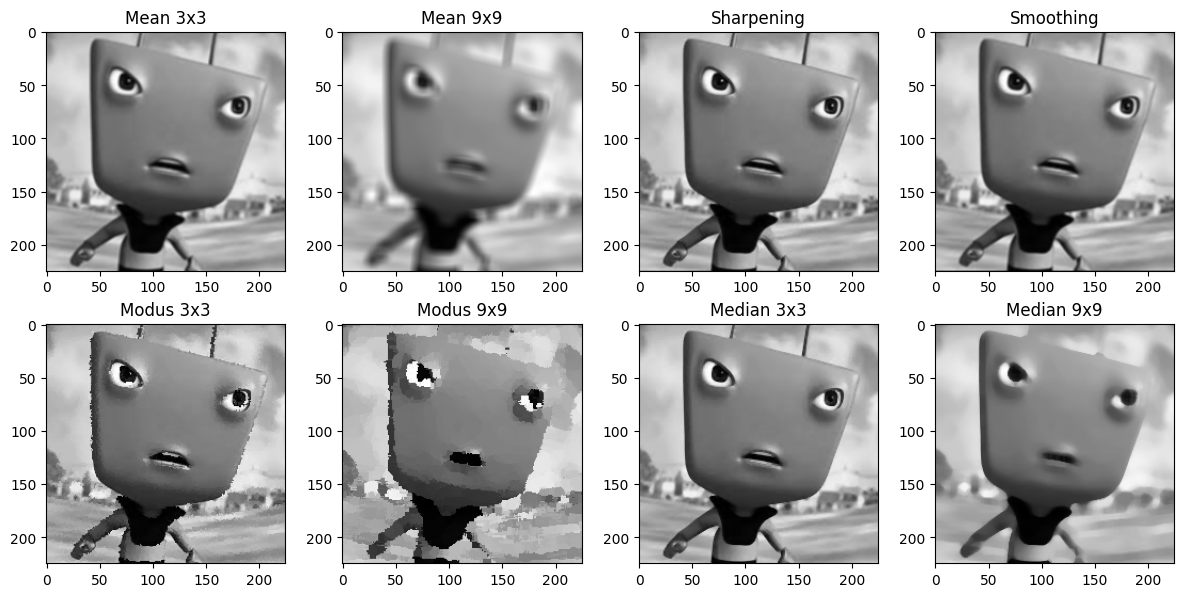

In [476]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 4, 1)
plt.title("Mean 3x3")
plt.imshow(img1, cmap='gray')
plt.subplot(2, 4, 2)
plt.title("Mean 9x9")
plt.imshow(img2, cmap='gray')
plt.subplot(2, 4, 3)
plt.title("Sharpening")
plt.imshow(adudu_sharp, cmap='gray')
plt.subplot(2, 4, 4)
plt.title("Smoothing")
plt.imshow(adudu_semut, cmap='gray')
plt.subplot(2, 4, 5)
plt.title("Modus 3x3")
plt.imshow(img3, cmap='gray')
plt.subplot(2, 4, 6)
plt.title("Modus 9x9")
plt.imshow(img4, cmap='gray')
plt.subplot(2, 4, 7)
plt.title("Median 3x3")
plt.imshow(img5, cmap='gray')
plt.subplot(2, 4, 8)
plt.title("Median 9x9")
plt.imshow(img6, cmap='gray')
plt.tight_layout()
plt.show()

In [477]:
prewitt_mean_3x3 = deteksi_tepi(img1, prewitt_gx, prewitt_gy, "prewitt")
prewitt_mean_9x9 = deteksi_tepi(img2, prewitt_gx, prewitt_gy, "prewitt")
prewitt_sharpening = deteksi_tepi(adudu_sharp, prewitt_gx, prewitt_gy, "prewitt")
prewitt_smoothing = deteksi_tepi(adudu_gray, prewitt_gx, prewitt_gy, "prewitt")
prewitt_modus_3x3 = deteksi_tepi(img3, prewitt_gx,prewitt_gy, "prewitt")
prewitt_modus_9x9 = deteksi_tepi(img4, prewitt_gx, prewitt_gy, "prewitt")
prewitt_median_3x3 = deteksi_tepi(img5, prewitt_gx, prewitt_gy, "prewitt")
prewitt_median_9x9 = deteksi_tepi(img6, prewitt_gx, prewitt_gy, "prewitt")

### Deteksi Tepi Menggunakan Prewitt Operator

Kode ini melakukan deteksi tepi pada citra yang telah diproses menggunakan berbagai teknik filtering dan pengolahan citra dengan menggunakan operator **Prewitt**. Prewitt adalah operator deteksi tepi yang menghitung gradien citra dalam arah horizontal dan vertikal untuk mendeteksi perubahan intensitas. Setiap teknik dan ukuran kernel yang digunakan diproses dengan operator Prewitt untuk mendeteksi tepi citra yang telah difilter.

Berikut adalah deskripsi masing-masing proses deteksi tepi yang diterapkan pada citra yang telah difilter:

1. **Deteksi Tepi dengan Prewitt (Mean 3x3)**  
   - `prewitt_mean_3x3`: Deteksi tepi diterapkan pada citra yang telah diproses dengan **mean filtering** 3x3. Deteksi tepi dilakukan dengan menggunakan operator Prewitt pada citra rata-rata untuk mendeteksi tepi-tepi yang terbentuk.

2. **Deteksi Tepi dengan Prewitt (Mean 9x9)**  
   - `prewitt_mean_9x9`: Deteksi tepi diterapkan pada citra yang telah diproses dengan **mean filtering** 9x9. Operator Prewitt digunakan untuk mendeteksi tepi dengan kernel yang lebih besar, memberikan deteksi tepi yang lebih halus pada citra dengan noise lebih banyak.

3. **Deteksi Tepi dengan Prewitt pada Citra Sharpening**  
   - `prewitt_sharpening`: Deteksi tepi diterapkan pada citra yang telah diproses dengan **sharpening** untuk memperjelas tepi dan detail citra. Prewitt digunakan untuk menyorot tepi yang lebih tajam dan lebih jelas setelah pengasahan citra.

4. **Deteksi Tepi dengan Prewitt pada Citra Smoothing**  
   - `prewitt_smoothing`: Deteksi tepi diterapkan pada citra yang telah diproses dengan **smoothing** untuk mengurangi noise. Deteksi tepi pada citra yang halus akan menunjukkan perubahan intensitas yang lebih halus di sepanjang tepi objek.

5. **Deteksi Tepi dengan Prewitt (Modus 3x3)**  
   - `prewitt_modus_3x3`: Deteksi tepi diterapkan pada citra yang telah diproses dengan **modus filtering** 3x3. Prewitt digunakan untuk mendeteksi perubahan intensitas pada citra yang lebih berbasis pada modus nilai piksel di sekitar piksel pusat.

6. **Deteksi Tepi dengan Prewitt (Modus 9x9)**  
   - `prewitt_modus_9x9`: Deteksi tepi diterapkan pada citra yang telah diproses dengan **modus filtering** 9x9. Teknik ini memberikan deteksi tepi pada citra yang lebih halus karena ukuran kernel yang lebih besar, memungkinkan deteksi tepi yang lebih konsisten.

7. **Deteksi Tepi dengan Prewitt (Median 3x3)**  
   - `prewitt_median_3x3`: Deteksi tepi diterapkan pada citra yang telah diproses dengan **median filtering** 3x3. Median filtering membantu mengurangi noise **salt-and-pepper** pada citra, dan operator Prewitt digunakan untuk mendeteksi tepi di citra yang lebih bersih.

8. **Deteksi Tepi dengan Prewitt (Median 9x9)**  
   - `prewitt_median_9x9`: Deteksi tepi diterapkan pada citra yang telah diproses dengan **median filtering** 9x9. Dengan kernel yang lebih besar, hasil deteksi tepi menjadi lebih halus dan dapat menangani noise dengan lebih baik.

### Prewitt adalah

Operator **Prewitt** menghitung gradien citra dalam dua arah: horizontal (untuk mendeteksi tepi vertikal) dan vertikal (untuk mendeteksi tepi horizontal). Hasilnya adalah citra yang menunjukkan keberadaan tepi pada setiap piksel. Semakin besar ukuran kernel yang digunakan dalam filtering (seperti pada 9x9), semakin halus hasil deteksi tepi, tetapi juga dapat menghilangkan beberapa detail kecil.

Kode ini memungkinkan untuk menganalisis efek dari berbagai jenis filtering (mean, modus, median) pada hasil deteksi tepi, memberikan pemahaman yang lebih baik tentang bagaimana setiap teknik mempengaruhi ketajaman dan keberhasilan deteksi tepi.


### Visualisasi Hasil Deteksi Tepi Menggunakan Prewitt Operator

Kode ini digunakan untuk menampilkan hasil deteksi tepi pada citra yang telah diproses menggunakan berbagai teknik filtering dan pengolahan citra, dengan menggunakan operator **Prewitt**. Visualisasi ini menunjukkan perbandingan antara beberapa metode filter (mean, modus, median) yang diterapkan pada citra dengan ukuran kernel yang berbeda (3x3 dan 9x9) dan efeknya pada deteksi tepi.

#### Deskripsi Visualisasi:

1. **Mean 3x3**  
   - Gambar yang ditampilkan pada subplot (2, 4, 1) menunjukkan hasil deteksi tepi menggunakan **mean filter** dengan kernel 3x3. Operator Prewitt digunakan untuk mendeteksi tepi setelah filtering mean diterapkan pada citra.

2. **Mean 9x9**  
   - Gambar pada subplot (2, 4, 2) menunjukkan hasil deteksi tepi pada citra yang telah diproses dengan **mean filter** ukuran kernel 9x9. Ukuran kernel yang lebih besar memberikan hasil deteksi tepi yang lebih halus.

3. **Sharpening**  
   - Gambar pada subplot (2, 4, 3) menunjukkan hasil deteksi tepi pada citra yang telah diproses dengan teknik **sharpening**. Deteksi tepi menjadi lebih tajam dan menonjolkan detail yang lebih jelas pada citra.

4. **Smoothing**  
   - Gambar pada subplot (2, 4, 4) menunjukkan deteksi tepi pada citra yang telah diproses dengan **smoothing**, yang mengurangi noise. Deteksi tepi pada citra yang lebih halus akan terlihat lebih tereduksi dibandingkan dengan citra yang lebih tajam.

5. **Modus 3x3**  
   - Gambar pada subplot (2, 4, 5) menunjukkan hasil deteksi tepi pada citra yang telah diproses dengan **modus filter** ukuran kernel 3x3. Teknik ini mengurangi noise dan memberikan hasil deteksi tepi yang lebih bersih.

6. **Modus 9x9**  
   - Gambar pada subplot (2, 4, 6) menunjukkan hasil deteksi tepi pada citra yang telah diproses dengan **modus filter** ukuran kernel 9x9. Kernel yang lebih besar memberikan hasil deteksi tepi yang lebih halus.

7. **Median 3x3**  
   - Gambar pada subplot (2, 4, 7) menunjukkan hasil deteksi tepi pada citra yang telah diproses dengan **median filter** ukuran kernel 3x3. Median filter efektif menghilangkan noise tipe salt-and-pepper, dan operator Prewitt mendeteksi tepi pada citra yang lebih bersih.

8. **Median 9x9**  
   - Gambar pada subplot (2, 4, 8) menunjukkan hasil deteksi tepi pada citra yang telah diproses dengan **median filter** ukuran kernel 9x9. Dengan ukuran kernel yang lebih besar, noise lebih banyak tereduksi dan hasil deteksi tepi lebih halus.




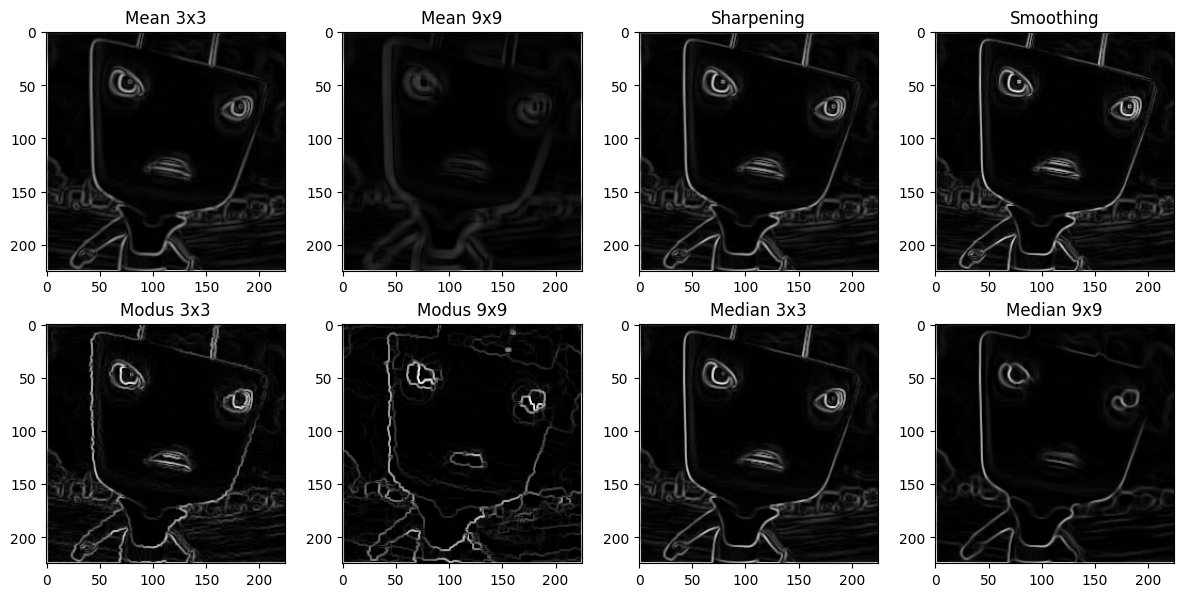

In [478]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 4, 1)
plt.title("Mean 3x3")
plt.imshow(prewitt_mean_3x3, cmap='gray')
plt.subplot(2, 4, 2)
plt.title("Mean 9x9")
plt.imshow(prewitt_mean_9x9, cmap='gray')
plt.subplot(2, 4, 3)
plt.title("Sharpening")
plt.imshow(prewitt_sharpening, cmap='gray')
plt.subplot(2, 4, 4)
plt.title("Smoothing")
plt.imshow(prewitt_smoothing, cmap='gray')
plt.subplot(2, 4, 5)
plt.title("Modus 3x3")
plt.imshow(prewitt_modus_3x3, cmap='gray')
plt.subplot(2, 4, 6)
plt.title("Modus 9x9")
plt.imshow(prewitt_modus_9x9, cmap='gray')
plt.subplot(2, 4, 7)
plt.title("Median 3x3")
plt.imshow(prewitt_median_3x3, cmap='gray')
plt.subplot(2, 4, 8)
plt.title("Median 9x9")
plt.imshow(prewitt_median_9x9, cmap='gray')
plt.tight_layout()
plt.show()


In [479]:
sobel_mean_3x3 = deteksi_tepi(img1, sobel_gx, sobel_gy, "sobel")
sobel_mean_9x9 = deteksi_tepi(img2, sobel_gx, sobel_gy, "sobel")
sobel_sharpening = deteksi_tepi(adudu_sharp, sobel_gx, sobel_gy, "sobel")
sobel_smoothing = deteksi_tepi(adudu_gray, sobel_gx, sobel_gy, "sobel")
sobel_modus_3x3 = deteksi_tepi(img3, sobel_gx, sobel_gy, "sobel")
sobel_modus_9x9 = deteksi_tepi(img4, sobel_gx, sobel_gy, "sobel")
sobel_median_3x3 = deteksi_tepi(img5, sobel_gx, sobel_gy, "sobel")
sobel_median_9x9 = deteksi_tepi(img6, sobel_gx, sobel_gy, "sobel")


### Penjelasan Deteksi Tepi dengan Operator Sobel

Pada kode ini, deteksi tepi dilakukan menggunakan operator Sobel pada citra yang telah melalui berbagai teknik filtering (mean, modus, median) dengan ukuran kernel 3x3 dan 9x9. Proses deteksi tepi ini diterapkan pada citra yang telah diproses sebelumnya seperti citra hasil sharpening dan smoothing.

1. **sobel_mean_3x3**  
   Deteksi tepi menggunakan filter mean dengan ukuran kernel 3x3, diterapkan dengan operator Sobel untuk mendeteksi tepi pada citra. Hasilnya menunjukkan tepi objek yang terdeteksi dengan menggunakan filter mean yang lebih kecil.

2. **sobel_mean_9x9**  
   Sama seperti sebelumnya, namun filter mean yang digunakan berukuran 9x9. Ukuran kernel yang lebih besar memungkinkan hasil deteksi tepi yang lebih halus dan merata, meskipun detail objek dapat sedikit hilang.

3. **sobel_sharpening**  
   Hasil deteksi tepi pada citra yang telah diproses dengan teknik sharpening. Sharpening meningkatkan kontras tepi, sehingga operator Sobel akan lebih mudah mendeteksi tepi yang lebih tajam.

4. **sobel_smoothing**  
   Hasil deteksi tepi pada citra yang telah diproses dengan teknik smoothing. Smoothing mengurangi noise, yang mengakibatkan deteksi tepi menjadi lebih halus, namun dengan kehilangan beberapa detail kecil.

5. **sobel_modus_3x3**  
   Deteksi tepi pada citra yang telah diproses dengan modus filter berukuran 3x3. Modus filter bekerja dengan menggantikan nilai piksel dengan nilai yang paling sering muncul di sekitar piksel tersebut, yang membantu mengurangi noise, sekaligus mempertahankan tepi objek.

6. **sobel_modus_9x9**  
   Sama seperti sebelumnya, namun modus filter yang digunakan berukuran 9x9. Ukuran kernel yang lebih besar memberikan hasil yang lebih halus dengan lebih sedikit noise, meskipun detail objek mungkin tereduksi.

7. **sobel_median_3x3**  
   Hasil deteksi tepi pada citra yang telah diproses dengan filter median berukuran 3x3. Median filter efektif dalam menghilangkan noise seperti salt-and-pepper, dan Sobel digunakan untuk mendeteksi tepi yang jelas pada citra yang telah diproses.

8. **sobel_median_9x9**  
   Sama seperti sebelumnya, namun median filter yang digunakan berukuran 9x9. Ini memberikan hasil deteksi tepi yang lebih halus dengan mengurangi noise secara lebih signifikan.

Pada setiap deteksi tepi ini, operator Sobel digunakan untuk menghitung gradien horizontal dan vertikal pada citra. Setelah itu, hasil gradien tersebut dihitung untuk mendapatkan magnitudo tepi pada setiap titik.


### Visualisasi Hasil Deteksi Tepi Menggunakan Sobel Operator

Kode ini digunakan untuk menampilkan hasil deteksi tepi pada citra yang telah diproses menggunakan berbagai teknik filtering dan pengolahan citra, dengan menggunakan operator **Sobel**. Visualisasi ini memberikan perbandingan antara beberapa metode filter (mean, modus, median) yang diterapkan pada citra dengan ukuran kernel yang berbeda (3x3 dan 9x9) dan efeknya pada deteksi tepi.

#### Deskripsi Visualisasi:

1. **Sobel Mean 3x3**  
   - Gambar yang ditampilkan pada subplot (2, 4, 1) menunjukkan hasil deteksi tepi menggunakan **mean filter** dengan kernel 3x3, diikuti dengan penerapan operator Sobel untuk mendeteksi tepi pada citra yang telah difilter.

2. **Sobel Mean 9x9**  
   - Gambar pada subplot (2, 4, 2) menunjukkan hasil deteksi tepi pada citra yang telah diproses dengan **mean filter** ukuran kernel 9x9, kemudian diikuti oleh deteksi tepi menggunakan operator Sobel.

3. **Sobel Sharpening**  
   - Gambar pada subplot (2, 4, 3) menunjukkan deteksi tepi pada citra yang telah diproses dengan teknik **sharpening**. Operator Sobel digunakan untuk mendeteksi tepi pada citra yang lebih tajam, memberikan detail tepi yang lebih menonjol.

4. **Sobel Smoothing**  
   - Gambar pada subplot (2, 4, 4) menunjukkan deteksi tepi pada citra yang telah diproses dengan teknik **smoothing**. Tepi yang terdeteksi cenderung lebih halus karena smoothing mengurangi noise, menghasilkan hasil deteksi tepi yang lebih bersih.

5. **Sobel Modus 3x3**  
   - Gambar pada subplot (2, 4, 5) menunjukkan hasil deteksi tepi pada citra yang telah diproses dengan **modus filter** ukuran kernel 3x3. Teknik modus efektif untuk menghilangkan noise, memberikan hasil deteksi tepi yang lebih akurat dan bersih.

6. **Sobel Modus 9x9**  
   - Gambar pada subplot (2, 4, 6) menunjukkan hasil deteksi tepi pada citra yang telah diproses dengan **modus filter** ukuran kernel 9x9. Dengan kernel yang lebih besar, noise dapat lebih efektif dihilangkan, menghasilkan deteksi tepi yang lebih halus.

7. **Sobel Median 3x3**  
   - Gambar pada subplot (2, 4, 7) menunjukkan hasil deteksi tepi pada citra yang telah diproses dengan **median filter** ukuran kernel 3x3. Median filter mengurangi noise tipe salt-and-pepper, sementara operator Sobel mendeteksi tepi pada citra yang lebih bersih.

8. **Sobel Median 9x9**  
   - Gambar pada subplot (2, 4, 8) menunjukkan hasil deteksi tepi pada citra yang telah diproses dengan **median filter** ukuran kernel 9x9. Dengan ukuran kernel yang lebih besar, noise lebih banyak tereduksi, memberikan hasil deteksi tepi yang lebih halus.



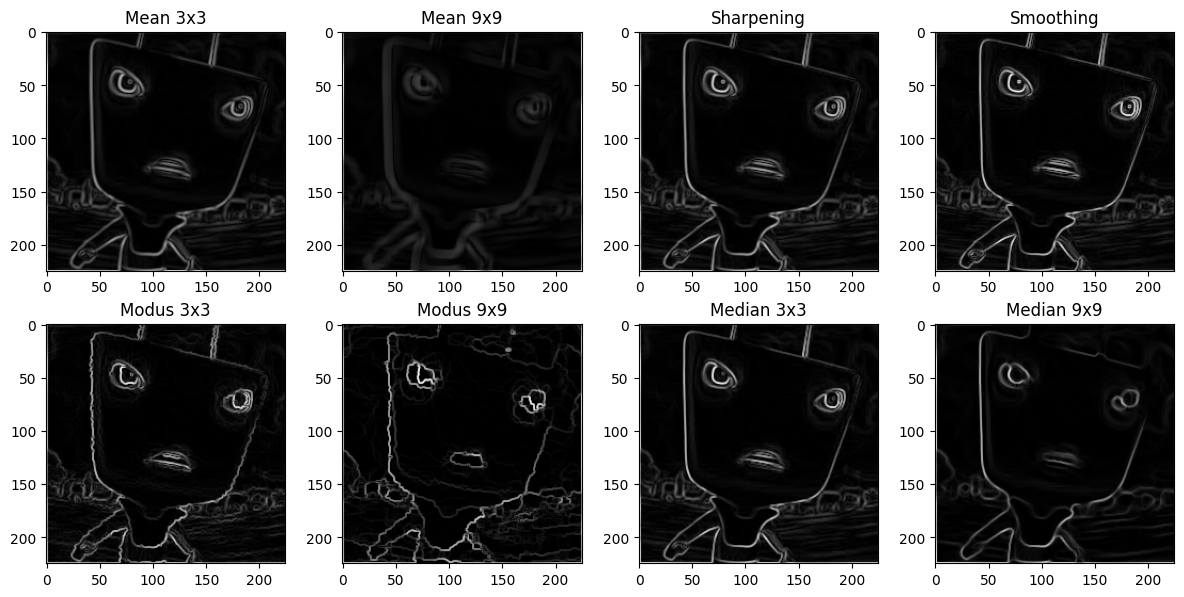

In [480]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 4, 1)
plt.title("Mean 3x3")
plt.imshow(sobel_mean_3x3, cmap='gray')
plt.subplot(2, 4, 2)
plt.title("Mean 9x9")
plt.imshow(sobel_mean_9x9, cmap='gray')
plt.subplot(2, 4, 3)
plt.title("Sharpening")
plt.imshow(sobel_sharpening, cmap='gray')
plt.subplot(2, 4, 4)
plt.title("Smoothing")
plt.imshow(sobel_smoothing, cmap='gray')
plt.subplot(2, 4, 5)
plt.title("Modus 3x3")
plt.imshow(sobel_modus_3x3, cmap='gray')
plt.subplot(2, 4, 6)
plt.title("Modus 9x9")
plt.imshow(sobel_modus_9x9, cmap='gray')
plt.subplot(2, 4, 7)
plt.title("Median 3x3")
plt.imshow(sobel_median_3x3, cmap='gray')
plt.subplot(2, 4, 8)
plt.title("Median 9x9")
plt.imshow(sobel_median_9x9, cmap='gray')
plt.tight_layout()
plt.show()


In [481]:
roberts_mean_3x3 = deteksi_tepi(img1, robert_gx, robert_gy, "roberts")
roberts_mean_9x9 = deteksi_tepi(img2, robert_gx, robert_gy, "roberts")
roberts_sharpening = deteksi_tepi(adudu_sharp, robert_gx, robert_gy, "roberts")
roberts_smoothing = deteksi_tepi(adudu_semut, robert_gx, robert_gy, "roberts")
roberts_modus_3x3 = deteksi_tepi(img3, robert_gx, robert_gy, "roberts")
roberts_modus_9x9 = deteksi_tepi(img4, robert_gx, robert_gy, "roberts")
roberts_median_3x3 = deteksi_tepi(img5, robert_gx, robert_gy, "roberts")
roberts_median_9x9 = deteksi_tepi(img6, robert_gx, robert_gy, "roberts")


### Penjelasan Deteksi Tepi dengan Operator Roberts

Deteksi tepi dengan menggunakan operator **Roberts** diterapkan pada citra yang telah diproses dengan berbagai teknik filtering (mean, modus, median) dengan ukuran kernel 3x3 dan 9x9. Proses ini dilakukan untuk melihat perbedaan hasil deteksi tepi pada citra yang sudah diproses menggunakan teknik lainnya.

1. **roberts_mean_3x3**  
   Deteksi tepi pada citra yang telah diproses dengan filter mean berukuran 3x3 menggunakan operator **Roberts**. Operator ini mendeteksi perubahan nilai intensitas antara dua piksel yang berdekatan, sangat sensitif terhadap tepi halus.

2. **roberts_mean_9x9**  
   Sama seperti sebelumnya, tetapi dengan filter mean berukuran 9x9. Ukuran kernel yang lebih besar ini memperhalus hasil deteksi tepi, tetapi mungkin kehilangan beberapa detail objek.

3. **roberts_sharpening**  
   Deteksi tepi pada citra yang telah diproses dengan teknik sharpening. Sharpening meningkatkan ketajaman dan kontras citra, membuat operator **Roberts** lebih efektif dalam mendeteksi tepi yang lebih jelas.

4. **roberts_smoothing**  
   Deteksi tepi pada citra yang telah diproses dengan teknik smoothing, yang mengurangi noise dalam citra. Hasil deteksi tepi mungkin menjadi lebih halus, meskipun beberapa detail kecil bisa hilang.

5. **roberts_modus_3x3**  
   Deteksi tepi pada citra yang telah diproses dengan filter modus berukuran 3x3. Filter modus menggantikan nilai piksel dengan nilai yang paling sering muncul di sekitar piksel tersebut, yang membantu mengurangi noise dan mempertahankan tepi objek.

6. **roberts_modus_9x9**  
   Sama seperti sebelumnya, tetapi dengan filter modus berukuran 9x9. Ukuran kernel yang lebih besar menghasilkan deteksi tepi yang lebih halus, mengurangi noise dengan lebih efektif, namun beberapa detail objek bisa hilang.

7. **roberts_median_3x3**  
   Deteksi tepi pada citra yang telah diproses dengan filter median berukuran 3x3. Filter median efektif dalam menghapus noise seperti salt-and-pepper dan digunakan bersama operator **Roberts** untuk mendeteksi tepi citra.

8. **roberts_median_9x9**  
   Sama seperti sebelumnya, tetapi dengan filter median berukuran 9x9. Ini menghasilkan deteksi tepi yang lebih halus dengan lebih sedikit noise, namun detail citra bisa tereduksi.

Pada setiap kasus, **Roberts** operator menghitung gradien citra untuk mendeteksi perubahan mendalam dalam intensitas cahaya, terutama di sepanjang tepi objek. Citra yang telah melalui berbagai tahap filtering ini akan menghasilkan perbedaan tepi yang terlihat jelas dalam hasil akhirnya.


### Visualisasi Hasil Deteksi Tepi dengan Operator Roberts

Dalam visualisasi ini, kita akan melihat hasil deteksi tepi menggunakan operator **Roberts** pada citra yang telah diproses dengan berbagai teknik filtering. Setiap subplot menampilkan hasil deteksi tepi dengan filter yang berbeda, baik itu dengan ukuran kernel 3x3 atau 9x9.

1. **Mean 3x3**  
   Pada subplot ini, citra yang telah diproses dengan filter mean berukuran 3x3, kemudian dilakukan deteksi tepi menggunakan operator **Roberts**. Filter mean memberikan efek smoothing pada citra, namun dengan ukuran kernel kecil, detail objek tetap bisa terlihat jelas.

2. **Mean 9x9**  
   Citra yang telah diproses dengan filter mean berukuran 9x9, menghasilkan smoothing yang lebih kuat. Ukuran kernel yang lebih besar menghaluskan citra lebih banyak, namun detail objek mungkin sedikit hilang.

3. **Sharpening**  
   Citra yang telah melalui proses sharpening, yang meningkatkan kontras dan ketajaman citra, kemudian diterapkan deteksi tepi menggunakan operator **Roberts**. Hasilnya adalah tepi yang lebih tajam dan lebih jelas.

4. **Smoothing**  
   Deteksi tepi pada citra yang telah diproses dengan teknik smoothing, yang mengurangi noise. Pada citra ini, tepi akan lebih halus dan noise yang tidak diinginkan akan berkurang.

5. **Modus 3x3**  
   Pada citra yang telah diproses dengan filter modus berukuran 3x3, deteksi tepi menggunakan operator **Roberts** menunjukkan perubahan intensitas yang lebih halus. Filter modus mengurangi noise dan mempertahankan detail utama.

6. **Modus 9x9**  
   Citra yang telah diproses dengan filter modus berukuran 9x9. Ukuran kernel yang lebih besar membuat hasil deteksi tepi lebih halus dan mengurangi noise lebih efektif.

7. **Median 3x3**  
   Hasil deteksi tepi pada citra yang diproses dengan filter median berukuran 3x3. Filter median sangat efektif untuk menghapus noise jenis salt-and-pepper, sementara operator **Roberts** mendeteksi tepi dengan baik.

8. **Median 9x9**  
   Sama dengan sebelumnya, namun dengan filter median berukuran 9x9. Hasilnya adalah deteksi tepi yang lebih halus dan lebih sedikit noise.

Dengan menggunakan berbagai teknik filtering seperti mean, modus, median, sharpening, dan smoothing, serta ukuran kernel yang berbeda, kita dapat melihat bagaimana deteksi tepi dengan operator **Roberts** menghasilkan variasi tepi citra yang berbeda-beda. 


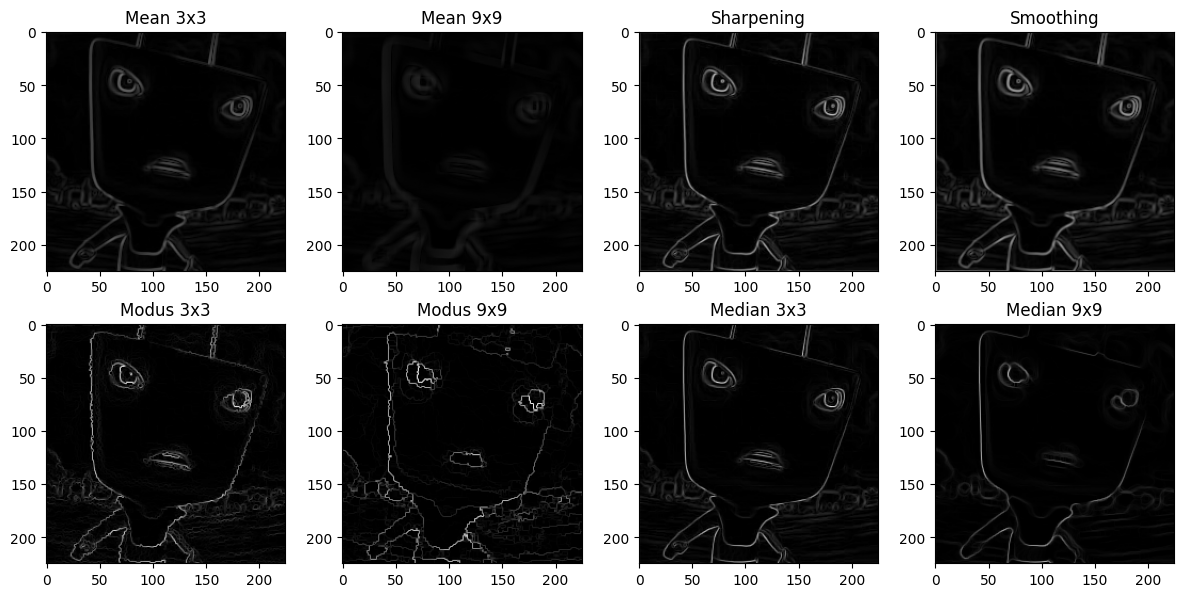

In [482]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 4, 1)
plt.title("Mean 3x3")
plt.imshow(roberts_mean_3x3, cmap='gray')
plt.subplot(2, 4, 2)
plt.title("Mean 9x9")
plt.imshow(roberts_mean_9x9, cmap='gray')
plt.subplot(2, 4, 3)
plt.title("Sharpening")
plt.imshow(roberts_sharpening, cmap='gray')
plt.subplot(2, 4, 4)
plt.title("Smoothing")
plt.imshow(roberts_smoothing, cmap='gray')
plt.subplot(2, 4, 5)
plt.title("Modus 3x3")
plt.imshow(roberts_modus_3x3, cmap='gray')
plt.subplot(2, 4, 6)
plt.title("Modus 9x9")
plt.imshow(roberts_modus_9x9, cmap='gray')
plt.subplot(2, 4, 7)
plt.title("Median 3x3")
plt.imshow(roberts_median_3x3, cmap='gray')
plt.subplot(2, 4, 8)
plt.title("Median 9x9")
plt.imshow(roberts_median_9x9, cmap='gray')
plt.tight_layout()
plt.show()


In [483]:
def convo(img, filt):
    h, w = img.shape
    fh, fw = filt.shape
    pad_h = fh // 2
    pad_w = fw // 2
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')
    output = np.zeros((h, w))

    for y in range(h):
        for x in range(w):
            region = padded[y:y+fh, x:x+fw]
            output[y, x] = np.sum(region * filt)
    return output


### Fungsi `convo`: Konvolusi Citra dengan Filter

Fungsi `convo` di atas ini digunakan untuk melakukan operasi konvolusi pada citra menggunakan filter tertentu. Konvolusi adalah teknik yang banyak digunakan dalam pengolahan citra, seperti dalam deteksi tepi, blur, dan berbagai efek lainnya. Fungsi ini mengaplikasikan filter pada setiap piksel citra dan menghasilkan output citra baru.

#### Parameter:
- `img`: Citra input yang akan diproses (array 2D).
- `filt`: Filter atau kernel yang akan diaplikasikan pada citra (array 2D).

#### Langkah-langkah:
1. **Padding Citra**  
   Sebelum melakukan konvolusi, citra diberi padding di sekitar tepi untuk memastikan ukuran hasil output sesuai dengan ukuran citra input. Padding ini menggunakan nilai piksel terdekat di tepi citra (`mode='edge'`), sehingga tidak ada informasi yang hilang ketika filter diterapkan pada piksel yang berada di tepi citra.
   
2. **Iterasi Melalui Setiap Piksel**  
   Fungsi ini melakukan iterasi melalui setiap piksel dalam citra dan mengambil "region" yang sesuai dengan ukuran filter. Region ini adalah sub-kotak yang sesuai dengan filter yang sedang diproses.

3. **Perhitungan Nilai Piksel Output**  
   Untuk setiap region, dilakukan perkalian antara region citra dan filter, lalu hasil perkalian tersebut dijumlahkan untuk menghasilkan nilai piksel output.

4. **Menghasilkan Citra Output**  
   Hasil konvolusi pada setiap piksel disimpan dalam array `output`, yang pada akhirnya akan menghasilkan citra baru yang telah diproses dengan filter.



### Pengolahan Citra Menggunakan Konvolusi dan Deteksi Tepi dengan Prewitt

Pada kode ini,boboiboy memperkuat dirinya citra **Boboiboy** yang telah diubah menjadi citra grayscale diproses dengan beberapa kali konvolusi menggunakan filter rata-rata 3x3 (mean filter). Setelah itu, dilakukan deteksi tepi menggunakan operator **Prewitt** untuk menghasilkan citra dengan tepi yang lebih jelas.

#### Langkah-langkah:
1. **Citra Grayscale Boboiboy**  
   Citra awal yang digunakan adalah citra grayscale dari Boboiboy. Hal ini dilakukan untuk memudahkan pengolahan citra, terutama dalam pengolahan tepi dan perataan.

2. **Konvolusi Bertingkat dengan Filter Mean 3x3**  
   Filter rata-rata 3x3 (mean filter) diterapkan pada citra secara berulang-ulang. Proses konvolusi dilakukan sebanyak 10 kali untuk memperoleh efek pemulusan citra yang semakin halus. Setiap iterasi mengaburkan citra lebih jauh, dengan menyaring nilai piksel menggunakan rata-rata dari sekelilingnya.

3. **Deteksi Tepi dengan Operator Prewitt**  
   Setelah konvolusi dilakukan sebanyak 10 kali, deteksi tepi dengan operator Prewitt diterapkan pada citra yang sudah diproses. Operator Prewitt digunakan untuk mengidentifikasi tepi-tepi pada citra, memberikan gambaran yang lebih jelas mengenai batas-batas objek dalam gambar.



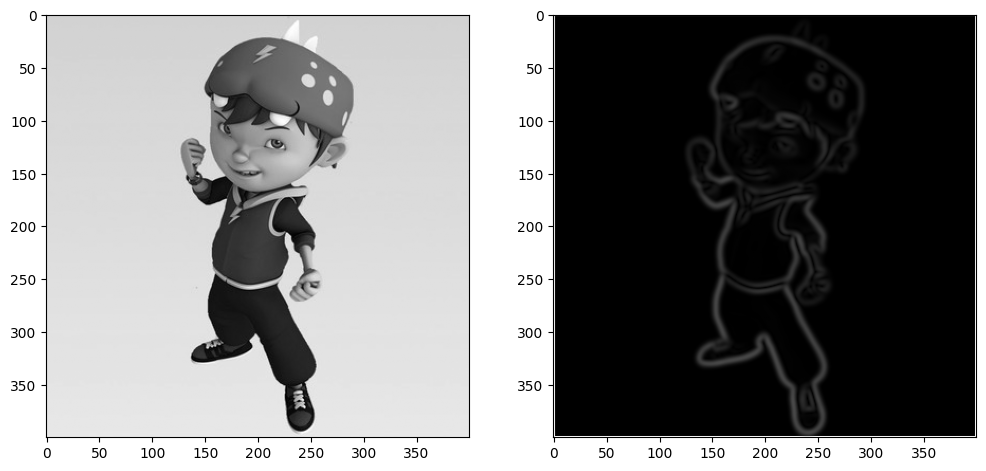

In [484]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(boboiboy_gray, cmap = 'gray')

mean_boboiboy = convo(boboiboy_gray, kernel_mean3x3)
mean2_boboiboy = convo(mean_boboiboy, kernel_mean3x3)
mean3_boboiboy = convo(mean2_boboiboy, kernel_mean3x3)
mean4_boboiboy = convo(mean3_boboiboy, kernel_mean3x3)
mean5_boboiboy =convo(mean4_boboiboy, kernel_mean3x3)
mean6_boboiboy =convo(mean5_boboiboy, kernel_mean3x3)
mean7_boboiboy =convo(mean5_boboiboy, kernel_mean3x3)
mean8_boboiboy =convo(mean7_boboiboy, kernel_mean3x3)
mean9_boboiboy =convo(mean8_boboiboy, kernel_mean3x3)
mean10_boboiboy =convo(mean9_boboiboy, kernel_mean3x3)

boboiboy_hitam = deteksi_tepi(mean10_boboiboy, prewitt_gx, prewitt_gy, "prewitt")

plt.subplot(1,2,2)
plt.imshow(boboiboy_hitam, cmap = 'gray')

In [485]:
def threshold(image, value, min_val, max_val):
    result = []  # hasil threshold

    for row in image:
        new_row = []
        for pixel in row:
            if pixel > value:
                new_row.append(max_val)
            else:
                new_row.append(min_val)
        result.append(new_row)

    return result

### Fungsi Thresholding pada Citra

Fungsi `threshold` digunakan untuk melakukan thresholding pada citra, yang mengubah nilai intensitas piksel citra berdasarkan nilai ambang yang ditentukan. Fungsi ini menerima 4 parameter:
1. **image**: Citra input yang akan diproses.
2. **value**: Nilai ambang yang digunakan untuk membandingkan nilai piksel.
3. **min_val**: Nilai yang akan diberikan kepada piksel jika nilai intensitasnya lebih rendah atau sama dengan nilai ambang.
4. **max_val**: Nilai yang akan diberikan kepada piksel jika nilai intensitasnya lebih besar dari nilai ambang.

### Penjelasan Kerja Fungsi:
1. **Inisialisasi**:  
   Fungsi dimulai dengan mendeklarasikan list kosong `result` yang nantinya akan menampung hasil citra yang telah diproses.
   
2. **Iterasi Setiap Baris (Row)**:  
   Fungsi akan melakukan iterasi melalui setiap baris citra (`for row in image:`). Setiap baris citra berisi nilai intensitas piksel.

3. **Iterasi Setiap Piksel**:  
   Pada setiap baris, fungsi kemudian akan melakukan iterasi pada setiap piksel (`for pixel in row:`). Untuk setiap piksel, nilai intensitasnya akan dibandingkan dengan nilai ambang yang diberikan.

4. **Penerapan Thresholding**:  
   - Jika nilai intensitas piksel lebih besar dari nilai ambang (`if pixel > value:`), maka nilai piksel tersebut akan diubah menjadi `max_val`.
   - Jika nilai intensitas piksel lebih kecil atau sama dengan nilai ambang (`else:`), maka nilai piksel tersebut akan diubah menjadi `min_val`.

5. **Hasil Citra**:  
   Setiap baris baru yang sudah terproses dimasukkan ke dalam `result`, dan pada akhirnya citra hasil thresholding yang baru akan dikembalikan oleh fungsi.


### Proses Thresholding dan Penerapan Filter Median pada Citra

Pada bagian kode ini, kita melakukan beberapa tahap pengolahan citra dengan menggunakan fungsi **thresholding** dan **filter median**. Berikut adalah penjelasan untuk masing-masing tahap.

#### 1. Thresholding Citra
Thresholding digunakan untuk memodifikasi intensitas piksel citra berdasarkan nilai ambang yang ditentukan. Citra `boboiboy_hitam` yang telah diperoleh sebelumnya, diterapkan threshold dengan menggunakan nilai ambang **1**, nilai minimum **0**, dan nilai maksimum **255**.




Text(0.5, 1.0, 'Ultra Instinct Median')

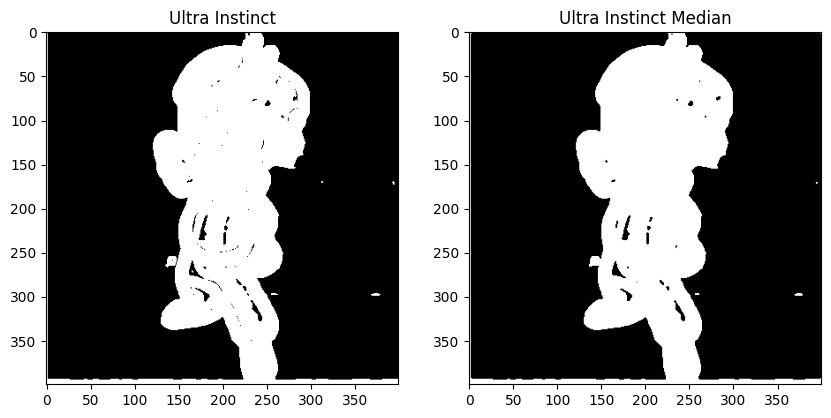

In [486]:
boboiboy_ultra_instinct = threshold(boboiboy_hitam, 1, 0, 255)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(boboiboy_ultra_instinct, cmap = 'gray')
plt.title("Ultra Instinct")

hitam_median = median_filtering(boboiboy_ultra_instinct,ksize=3)

plt.subplot(1,2,2)
plt.imshow(hitam_median, cmap = 'gray')
plt.title("Ultra Instinct Median")

### Boboiboy kuase tige

### Menampilkan Komponen Warna dalam Citra RGB

Pada bagian kode ini, kita membagi citra RGB (`boboiboy`) menjadi tiga komponen warna, yaitu **merah (api)**, **hijau (angin)**, dan **biru (air)**, kemudian menampilkannya dalam tiga subplot.

#### 1. Memisahkan Komponen Warna
Citra RGB memiliki tiga saluran warna: merah (Red), hijau (Green), dan biru (Blue). Untuk memisahkan komponen warna ini, kita mengambil setiap saluran warna dari citra dengan cara berikut:



Text(0.5, 1.0, 'Air')

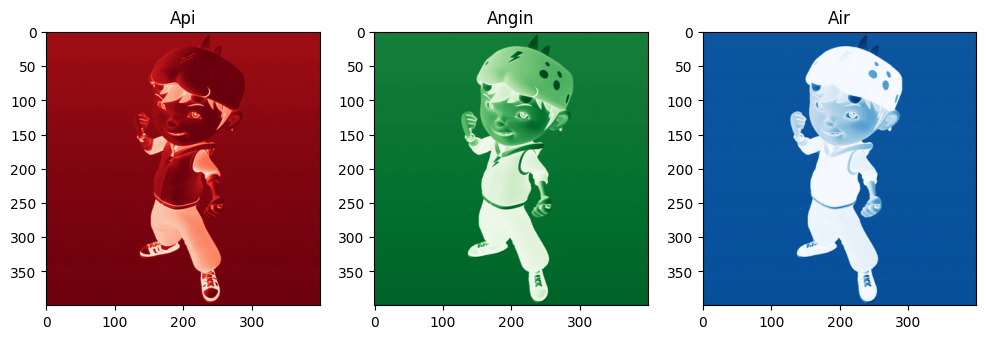

In [487]:
api = boboiboy[:, :, 0]
angin = boboiboy[:, :, 1]
air = boboiboy[:, :, 2]

plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
plt.imshow(api, cmap = 'Reds')
plt.title("Api")

plt.subplot(1, 3, 2)
plt.imshow(angin, cmap = 'Greens')
plt.title("Angin")

plt.subplot(1, 3, 3)
plt.imshow(air, cmap = 'Blues')
plt.title("Air")

### Menggabungkan Komponen Warna Berdasarkan Masker

Pada kode ini, kita mengalikan hasil dari operasi **median filtering** (`hitam_median`) dengan setiap komponen warna dari citra `boboiboy`, yang telah dipisahkan menjadi saluran merah (api), hijau (angin), dan biru (air). Proses ini menghasilkan tiga citra baru, masing-masing mewakili saluran warna yang telah dimodifikasi oleh masker median.



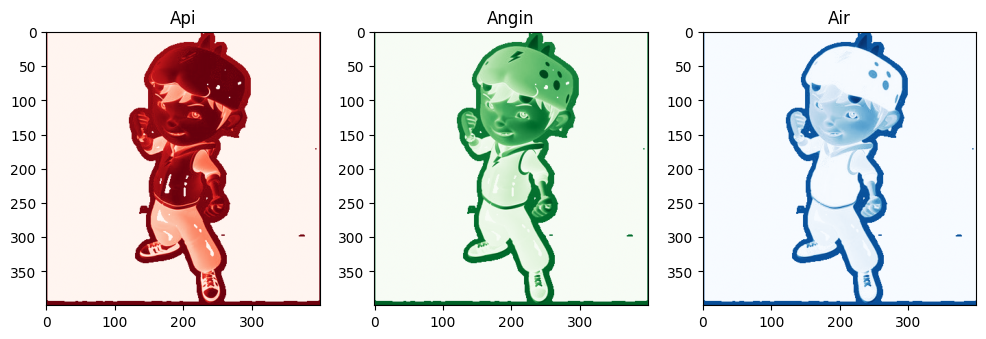

In [488]:
R_boboiboy = np.array(hitam_median) * api
G_boboiboy = np.array(hitam_median) * angin
B_boboiboy = np.array(hitam_median) * air

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(R_boboiboy, cmap = "Reds")
plt.title("Api")

plt.subplot(1,3,2)
plt.imshow(G_boboiboy, cmap = "Greens")
plt.title("Angin")

plt.subplot(1,3,3)
plt.imshow(B_boboiboy, cmap = "Blues")
plt.title("Air")

plt.show()

### Proses Pembentukan Citra RGB dan Penerapan Alpha Blending

Pada kode ini, kita melakukan beberapa langkah untuk membentuk citra RGB dan menerapkan teknik alpha blending untuk menghasilkan efek visual seperti "Boboiboy Ultimate Ultra Instinct". Berikut adalah penjelasan tentang setiap langkah yang dilakukan:

#### 1. **Normalisasi Warna RGB dari Komponen Terpisah**

Untuk membentuk citra RGB, kita memisahkan komponen warna (merah, hijau, biru) dan menormalkan setiap komponen dengan membaginya dengan 255 (agar nilai piksel berada antara 0 dan 1).



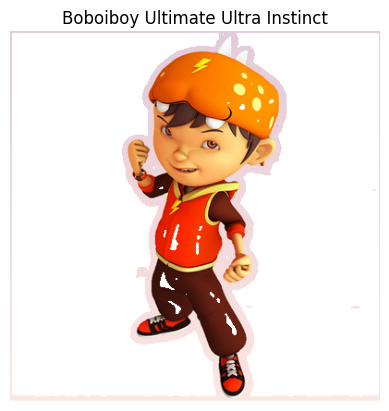

In [489]:
# Normalisasi warna RGB dari komponen terpisah
red = api / 255.0
green = angin / 255.0
blue = air / 255.0

# Gabungkan ketiga channel menjadi satu array RGB
rgb_image = np.stack([red, green, blue], axis=2)

# Normalisasi mask (grayscale image hitam_median)
mask = np.array(hitam_median, dtype=float)
if mask.max() > 1.0:
    mask /= 255.0

# Buat background putih
white_background = np.ones_like(rgb_image)

# Komposisi akhir menggunakan alpha blending
Ultimate_Final_Ultra_Instinct = white_background * (1 - mask[..., None]) + rgb_image * mask[..., None]

plt.imshow(Ultimate_Final_Ultra_Instinct)
plt.title("Boboiboy Ultimate Ultra Instinct")
plt.axis('off')
plt.show()

# Analisis Alur Perubahan Boboiboy ke Mode Ultimate Final Ultra Instinct

## 1. Awal: Citra Boboiboy
Proses dimulai dengan citra asli Boboiboy, yang diubah menjadi representasi warna grayscale. Citra ini menggambarkan keadaan awal Boboiboy dalam bentuk yang lebih sederhana. Sebelum mencapai mode Ultimate Final Ultra Instinct, beberapa tahap pemrosesan citra dan efek diterapkan.

## 2. Deteksi Tepi dengan Operator Prewitt
Setelah citra asli diproses menjadi grayscale, proses deteksi tepi menggunakan operator Prewitt diterapkan untuk menyoroti struktur tepi dalam citra. Teknik deteksi tepi bertujuan untuk mengidentifikasi batas-batas atau perubahan signifikan dalam gambar yang dapat memperjelas objek atau fitur tertentu.

Deteksi Tepi Prewitt memanfaatkan dua kernel (horizontal dan vertikal) untuk mendeteksi perubahan intensitas pada arah tertentu, seperti horizontal atau vertikal. Dalam hal ini, operasi ini berfungsi untuk memisahkan objek dalam citra dari latar belakang dengan lebih jelas.

## 3. Thresholding pada Citra Hasil Deteksi Tepi
Setelah deteksi tepi, citra diubah dengan thresholding, yang menetapkan ambang batas pada setiap piksel citra untuk membedakan nilai terang dan gelap. Teknik thresholding ini mengubah citra grayscale menjadi citra biner (hitam dan putih) dengan nilai ambang yang telah ditentukan.

Thresholding memungkinkan fokus pada area yang memiliki perubahan signifikan dalam intensitas piksel, sambil mengabaikan detail kecil yang tidak penting. Dalam hal ini, proses ini memungkinkan kita untuk melihat dengan jelas bagian-bagian tertentu dari citra yang lebih menonjol.

## 4. Penerapan Filter Median untuk Penghalusan
Citra yang telah melalui proses thresholding kemudian mengalami filter median. Filter ini digunakan untuk mengurangi noise (gangguan piksel yang tidak diinginkan) dan memberikan hasil yang lebih halus.

Median Filtering adalah proses yang menggantikan setiap piksel dengan nilai median dari piksel-piksel tetangganya dalam ukuran kernel tertentu (misalnya, 3x3). Filter ini memberikan efek smoothing pada citra dan memperbaiki hasil akhir dengan mengurangi gangguan visual yang mungkin muncul setelah thresholding.

## 5. Pemisahan Saluran Warna (RGB)
Setelah proses penghalusan, citra dipisahkan menjadi tiga saluran warna utama: Merah (Red), Hijau (Green), dan Biru (Blue). Setiap saluran warna ini mewakili elemen-elemen yang berbeda dari "elemen alami" Boboiboy — yaitu api, angin, dan air — sesuai dengan konsep karakter Boboiboy yang berhubungan dengan kekuatan elemen. canda plis jangan diseriusin

- **Api (Merah)** untuk kekuatan yang kuat dan agresif.
- **Angin (Hijau)** untuk kekuatan yang cepat dan fleksibel.
- **Air (Biru)** untuk kekuatan yang tenang dan menenangkan.
WKWKWKWKKWWKWK

## 6. Penggabungan Kembali Saluran Warna RGB
Setelah memisahkan saluran warna, kita kemudian menggabungkan kembali ketiga saluran tersebut untuk membentuk citra RGB yang utuh. Proses ini menciptakan sebuah citra berwarna dengan tiga dimensi, di mana setiap saluran warna (merah, hijau, biru) memiliki nilai yang telah dinormalisasi (berada dalam rentang 0 hingga 1).

## 7. Penerapan Alpha Blending untuk Efek Final
Alpha blending adalah teknik yang digunakan untuk menggabungkan citra RGB dengan masker hitam putih (grayscale) yang sebelumnya telah diproses. Masker ini digunakan untuk menentukan seberapa transparan bagian-bagian tertentu dari citra akhir. Bagian yang lebih terang dalam masker akan mengutamakan citra RGB, sementara bagian yang lebih gelap mengutamakan latar belakang putih.

Alpha Blending memungkinkan penggabungan dua citra dengan mempertimbangkan transparansi masing-masing. Di sini, teknik ini menciptakan transisi yang halus antara latar belakang putih dan citra RGB Boboiboy, yang memberikan efek visual yang lebih halus dan artistik, serta menciptakan citra akhir yang lebih dinamis.

## 8. Citra Akhir: Ultimate Final Ultra Instinct
Hasil akhirnya adalah citra Ultimate Final Ultra Instinct Boboiboy yang menggambarkan bentuk paling kuat dan penuh potensi dari Boboiboy. Citra ini menggabungkan semua elemen alami yang terkait dengan Boboiboy—api, angin, dan air—ke dalam satu citra yang bersinar dan dinamis. Teknik alpha blending yang diterapkan memberikan kesan transisi antara dunia nyata dan dunia yang lebih kuat dan mistis, menciptakan efek visual yang sangat kuat dan penuh keajaiban.
